<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Titanic-Machine Learning From Disaster End To End Project</b></div>

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" style="width:600px;height:300px"/>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Notebook- </b> Goal </h2>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

💡 In this project we will do binary classififcation on Titanic Survival Data (Kaggle Competition)<br>

💡The main aim of this project is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.<br>
</div>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Notebook- </b> Content </h2>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

💡 Basic Understanding of Data.<br>

💡 Expolatory Data Analysis (EDA).<br>

💡 Feature Engineering.<br>

💡 Data Preprocessing.<br>

💡 Model Building.<br>

💡 Model Performacne Check.<br>

💡 Best Performing Model Selecions.<br>

💡 Hyper-Parameter Tunning.<br>

💡 Predicting Test Data.<br>

💡 Submitting Prediction.<br>
</div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Importing- </b> Libraries </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
sns.set_palette("Set2")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

from scipy import stats as st
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# from imblearn.over_sampling import SMOTE

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Loading- </b> Datasets </h2>

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Feature- </b> Description </h2>

> * **PassengerId:** This feature indicates the Id of each passengers.
> * **Survived:** this features indicates whether the passenger has survived or not. **0 means Not- Survived** & **1 means Survived**
> * **pclass:** A proxy for socio-economic status (SES) **1st = Upper**, **2nd = Middle**, **3rd = Lower**
> * **Name:** This feature is indicating the names of individual passengers.
> * **Sex:** This feature is indicating the gender of the passengers.
> * **age:** this feature is indicating the age of individual passengers.
> * **sibsp:** The dataset defines family relations in this way...**Sibling** = brother, sister, stepbrother, stepsister,  **Spouse** = husband, wife (mistresses and fiancés were ignored)
> * **parch:** The dataset defines family relations in this way... **Parent:** = mother, father, **Child:** = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
> * **Ticket:** This feature is showing the Ticket Number of each passengers.
> * **Fare:** The amount paid by the passenger to get the Ticket.
> * **Cabin:** This feature is indicating the cabin deck & number of individual passengers.
> * **Embarked:** Embarked implies where the traveler mounted from. There are three possible values for Embark — **Southampton, Cherbourg, and Queenstown**. More than **70% of the people boarded from Southampton**

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Basic Understadning of Data</b></div>

### 1. Checking shape of both Training & Testing Datasets.

In [3]:
print("The shape of Training Datasets is:",train_df.shape)
print("The shape of Testing Datsets is:",test_df.shape)

The shape of Training Datasets is: (891, 12)
The shape of Testing Datsets is: (418, 11)


### 2. Showing Training & Testing Data.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can observe that we don't have <b>Survived</b> feature in our <b>Test Dataset.</b><br>
💡 So we have to build a model using Training Data and predict that feature for our Testing Data.<br>
</div>

### 3. Getting Basic Information of Data

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can observe that only <b>Name, Sex, Ticket, Cabin & Embarked</b> features are having data-type <b>object</b>.<br>
💡 But in reality <b>Survived & Pclass</b> are also showing categorical values.<br>
💡 So befor <b>EDA</b> we will replace those values with their respective categorical values.<br>
</div>

### 4. Descriptive Statistical Analysis of Numerical Features on Training Data.

In [7]:
train_df.describe(percentiles=[0.25,0.50,0.60,0.65,0.70,0.75,0.80]).T

,count,mean,std,min,25%,50%,60%,65%,70%,75%,80%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,535.0000,579.5,624.0,668.5,713.0000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,0.0000,1.0,1.0,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0000,3.0,3.0,3.0,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,31.8000,34.0,36.0,38.0,41.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,0.0000,0.0,1.0,1.0,1.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,21.6792,26.0,27.0,31.0,39.6875,512.3292


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 In PassengerId feature we can observe there are total 891 unique values. So it's better to drop this featrue.<br>
💡 In Survived feature we can observe that almost 60% of data is 0 so we can say most of the passengers didn't Survived<br>
💡 In PClass featue we can observe that maximum value is 3 which means most of the passengers were from Lower Class and we can also observe that minimum value is 1 which means Upper Class passenger were very less.<br>
💡 In Age feature we can observe 25%, 50% & 75% percentiles values as 20, 28 & 31 So we can say that most of the passengers were between these ages.<br>
💡 In SibSp feature we can observe that almost 60% percentile of data is 0. So we can say that most of the passengers are travelling without their Siblings or Spouse<br>
💡 In Parch feature we can observe that almost 75% percentile of data is 0. So we can say that most of the passengers are travelling without their Parent or Childen<br>
💡 In Fare feature we can observe that some passengers travelled without any cost as the minimum value is 0<br>
</div>

### 5. Checking Cardinality of Categorical Features in  Both Datasets.

In [8]:
print("Cardinality of Categorical Features in Training Data is:")
print(train_df.select_dtypes("object").nunique())
print("\n"+"-"*100)
print("\nCardinality of categorical Featuress in testing Data is:")
print(test_df.select_dtypes("object").nunique())

Cardinality of Categorical Features in Training Data is:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

----------------------------------------------------------------------------------------------------

Cardinality of categorical Featuress in testing Data is:
Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can oberver that Name & Ticket are having high Cardinailty.<br>
💡 We normally drop features having high cardinality but in this project we will try to do Feature Engineeering on those features.<br>
💡 So that we can avoid Data Loss because more amount of data leads to more accurate prediction by the model.<br>

### 6. Checking Duplicates in our Datasets

In [9]:
print(f"Duplicate in Training Data is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)}%)")
print(f"Duplicate in Testing Data is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)}%)")

Duplicate in Training Data is:0,(0.0%)
Duplicate in Testing Data is:0,(0.0%)


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can clearly observe that we don't have any duplicate values in our both training & testing datasets.<br>
💡 So we can say that we don't have any type of Data lekage in our both datasets.<br>

### 7. Checking Total Number & Percentage of Missing Values in Training Datasets.

In [10]:
df = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing Values"})
df["% of Missing Values"] = round(df["Number of Missing Values"]*100/len(train_df),2)
df

,Number of Missing Values,% of Missing Values
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 In Cabin feature we can observe that almost 77% of values are NaN values.So it's better we drop this feature from our Training Data.<br>
💡 In Embarked feature we can observe that there are only 2 NaN values. So we replace those values with suitable values.<br>
💡 In Age feature we can observe that almost 20% of values are NaN values. But we can't drop this feature because it seems relevant feature with our target data. So we will fill those values with suitable values.<br>
</div>

### 8. Checking Total Number & Percentage of Missing Values in Testing Datasets.

In [11]:
df = test_df.isnull().sum()[test_df.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing Values"})
df["% of Missing Values"] = round(df["Number of Missing Values"]*100/len(test_df),2)
df

,Number of Missing Values,% of Missing Values
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 In Cabin feature we can observe that almost 78% values are NaN values.So it's better we drop this feature from our Testing Data also.<br>
💡 In Fare feature we can observe that there is only 1 NaN value. So it's betetr we replace that value with suitable value.<br>
💡 In Age feature we can observe that almost 20% of values are NaN values. But we can't drop this feature because it seems relevant feature with our target data. So we will fill those values with suitable values.<br>
</div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Exploratory Data Analysis</b></div>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Visualizing- </b> Target Data </h2>

In [12]:
train_df["Survived"].head().to_frame()

,Survived
0,0
1,1
2,1
3,1
4,0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>
💡 We know that in Survived feature 0 means not-Survived & 1 means Survived<br>
💡 So for better visualization let's replace those numerical values with their original values.<br></div>

In [13]:
train_df["Survived"].replace({0:"Not-Survived",1:"Survived"},inplace=True)

In [14]:
z = train_df["Survived"].value_counts().to_frame()
z

,Survived
Not-Survived,549
Survived,342


**Ploting Pie-Chart & Count Plot to gain Insights**

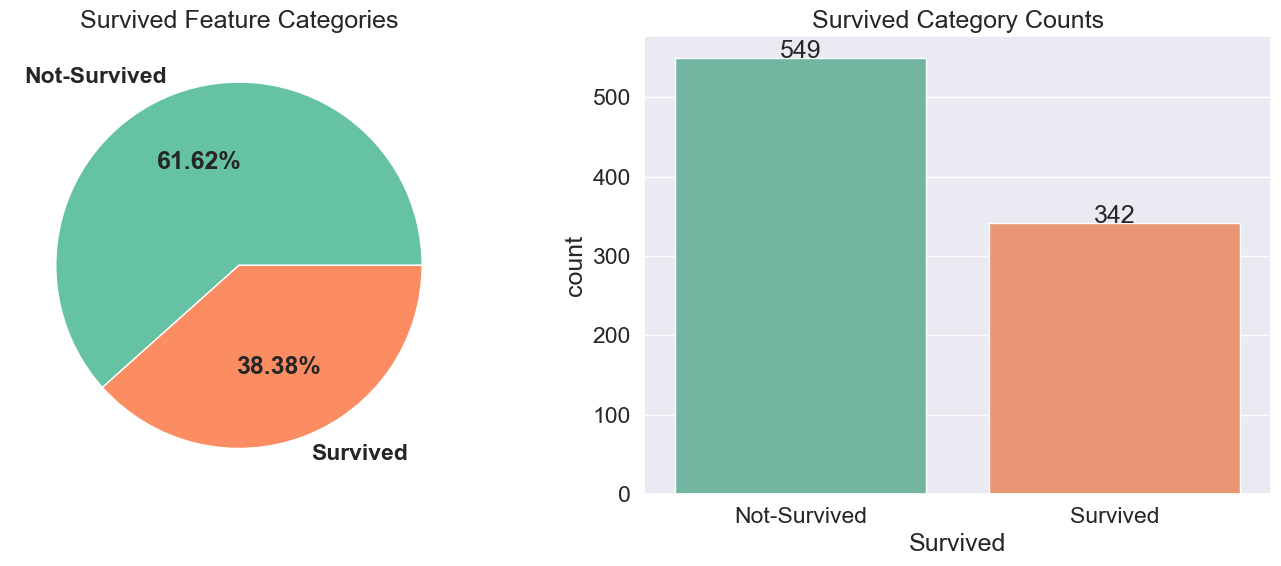

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(z.values.ravel(),labels=z.index,autopct="%0.2f%%",textprops={"fontweight":"black"})
plt.title("Survived Feature Categories")

plt.subplot(1,2,2)
sns.countplot(x="Survived",data=train_df)
plt.title("Survived Category Counts")
for i,j in enumerate(z["Survived"]):
    plt.text(i,j,j,ha="center")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can observe that our Survived feature is not balanced.<br>
💡 So we have to use technique like over_Sampling or under_sampling.<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. Visualizing- </b> Pclass Feature </h2>

In [17]:
train_df["Pclass"].head().to_frame()

,Pclass
0,Lower_Class
1,Upper_Class
2,Lower_Class
3,Upper_Class
4,Lower_Class


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>
💡 We know that in Pclass 1 means Upper class , 2 means Middle class & 3 means Lower Class<br>
💡 So better visualization let's replace those numerical values with their original values.<br></div>

In [16]:
train_df["Pclass"].replace({1:"Upper_Class",2:"Middle_Class",3:"Lower_Class"},inplace=True)
test_df["Pclass"].replace({1:"Upper_Class",2:"Middle_Class",3:"Lower_Class"},inplace=True)

In [18]:
z = train_df["Pclass"].value_counts().to_frame()
z

,Pclass
Lower_Class,491
Upper_Class,216
Middle_Class,184


**Plotting Pie-Chart & Countplot to gain Insights**

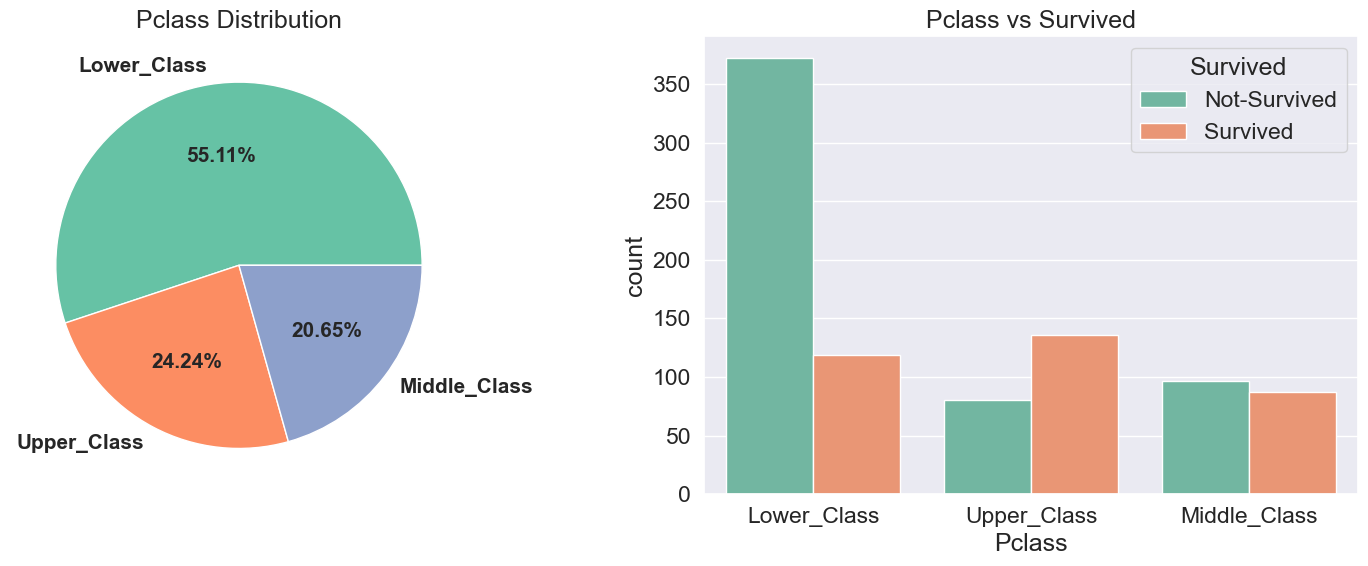

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(z.values.ravel(),labels=z.index.tolist(),autopct="%0.2f%%",textprops={"fontweight":"black","size":15})
plt.title("Pclass Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Pclass",hue="Survived",data=train_df)
plt.title("Pclass vs Survived")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 From pie-chart we can clearly observe that most of the passengers were from Lower class<br>
💡 From countplot we can observe the following things:<br>
1. If the passenger is from Lower Class than there is very less chance of Survival<br>
2. If the passenger is from Middle Class than there is almost equal chance of Survival<br>
3. If the passengers is from Upper Class than there is High chance of Survival<br>
</div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Visualizing- </b> Sex Feature </h2>

In [20]:
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [21]:
z = train_df["Sex"].value_counts().to_frame()
z

,Sex
male,577
female,314


**Plotting Pie-Chart & Countplot to gain Insights**

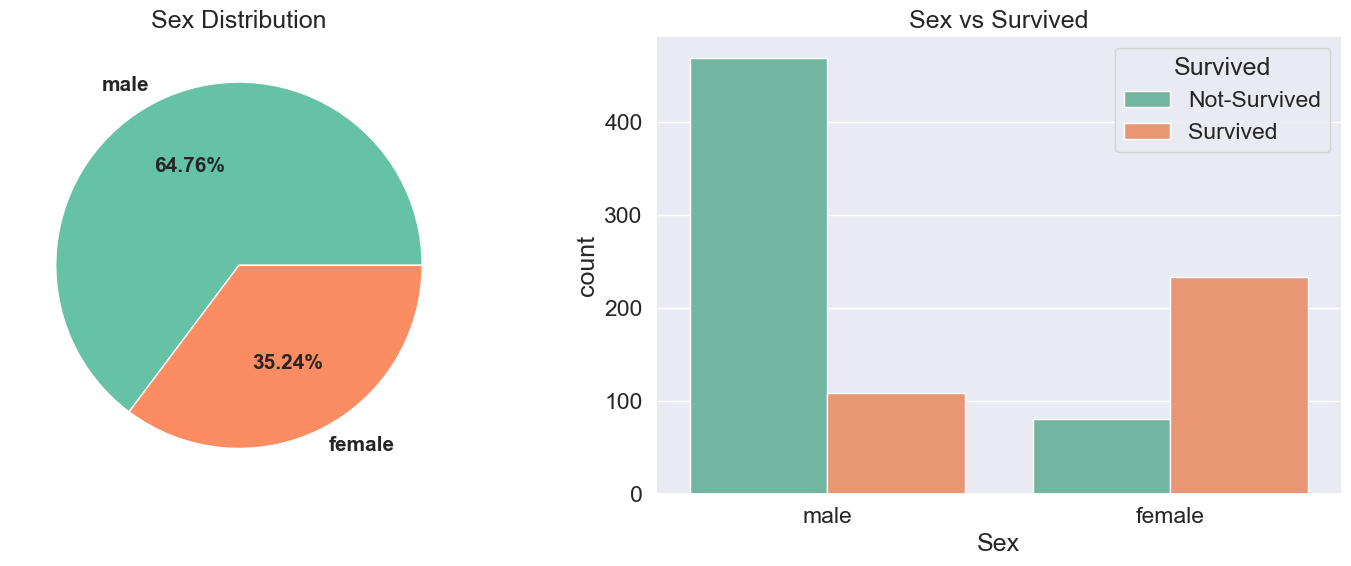

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(z.values.ravel(),labels=z.index.tolist(),autopct="%0.2f%%",textprops={"fontweight":"black","size":15})
plt.title("Sex Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Sex",hue="Survived",data=train_df)
plt.title("Sex vs Survived")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 From pie-chart we can clearly observe that most of the passengers are male<br>
💡 From countplot we can observe following things:<br>
1. If the passenger is male than he has very less chance of Survival<br>
2. If the passenger is female than she has very high chance of Survival<br>
</div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. Visualizing- </b> Age Feature </h2>

In [23]:
train_df["Age"].head().to_frame()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


**Plotting Histogram to gain Insights**

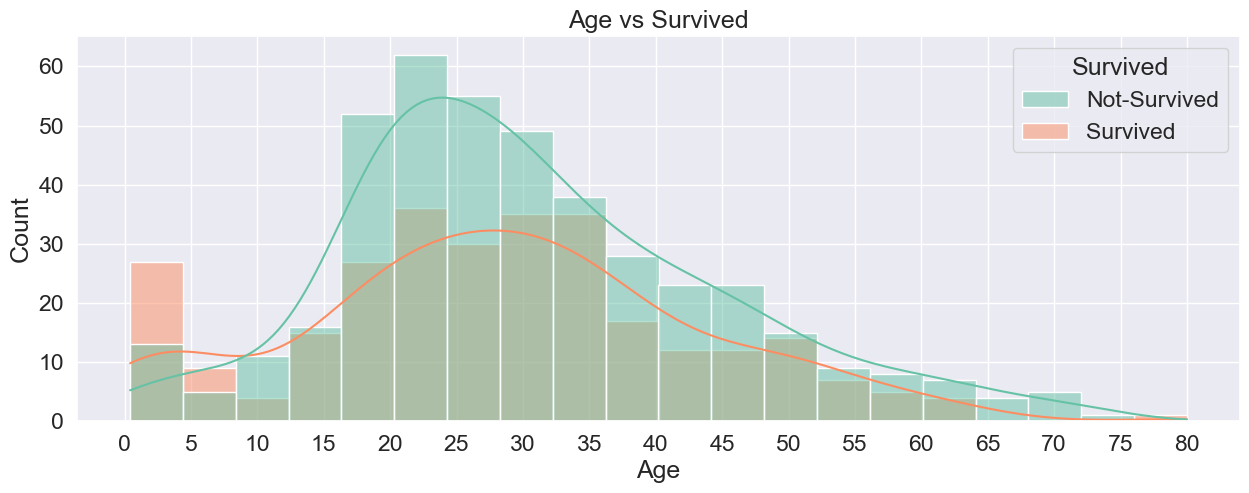

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(x="Age", hue="Survived", data=train_df, kde=True)
plt.title("Age vs Survived")
plt.xticks(list(range(0,81,5)))
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can easily observe that most of the passenger were between 20 to 35.<br>
💡 We can observe that age from 0-10 are highly Survived when compared with Not Survived. Specially for small childrens.<br>
💡 We can observe that age from 11 to 65 are comparatively less Survived.<br>
💡 We can observe that passengers having age more than 65 have negligible chance of being Survived.<br>

<b>Insights</b><br>

💡 We can do Feature Engineering to create a new feature Age Category by splitting age into different categories<br>
💡 We will do that in the Feature Engineering Section<br>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. Visualizing- </b> SibSp Feature </h2>

In [25]:
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

**Note**
* Here the numbers are showing the passengers travelling with hom many spouse or siblings.

In [26]:
z = train_df["SibSp"].value_counts().to_frame()
z

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


**Plotting Pie-chart and Countplot to gain Insights**

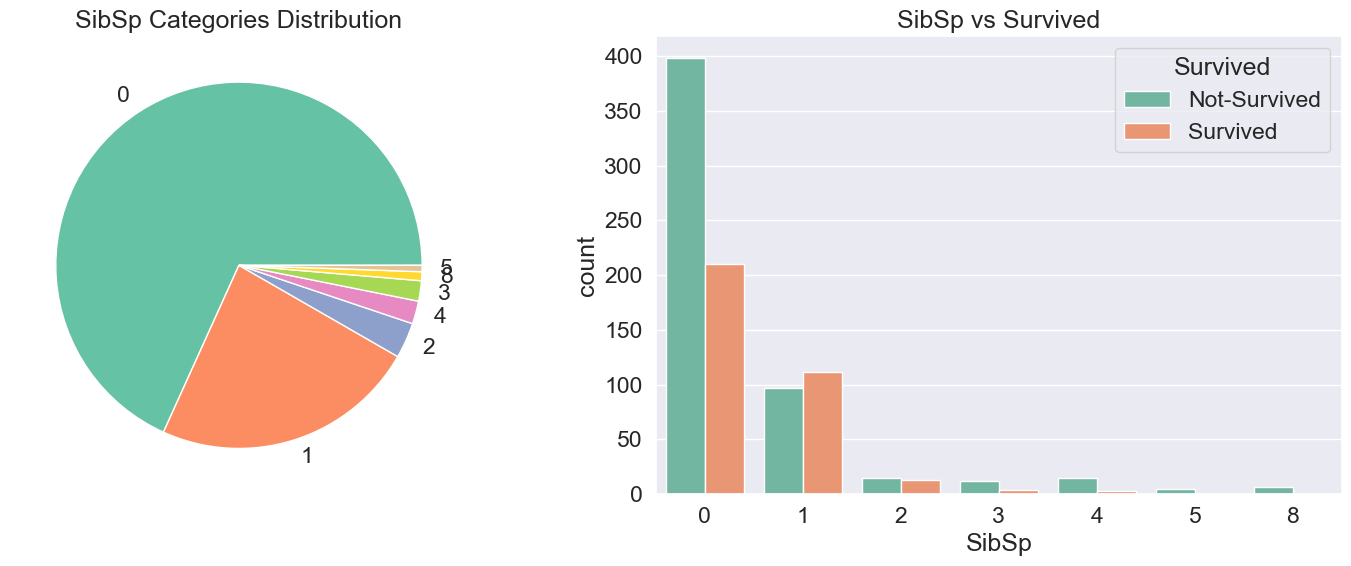

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(z["SibSp"],labels=z.index.tolist())
plt.title("SibSp Categories Distribution")

plt.subplot(1,2,2)
sns.countplot(x="SibSp",hue="Survived",data=train_df)
plt.title("SibSp vs Survived")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 From piechart we can observe that most of the passenger are travelling without any sibling or spouse<br>
💡 From coutplot we can observe following things:<br>
1. Passengers travelling with 0 sibling/spouse have almost chance of Survival<br>
2. Passengers travelling with 1 sibling/spouse have high chance of Survival<br>
3. Passengers travelling with 2 sibling/spouse have almost equal chance of Survival<br>
4. Passengers travelling with more than 2 sibling/spouse have almost negligible chance of Survival<br>

<b>Insights</b><br>

💡 We can do Feature Engineering to create a new feature SibSp Category in which we can indicate the following things.<br>
1. If the passengers is travelling with 0 sibling/spouse than we can categorize them as No Sibling/Spouse<br>
2. If the passengers is travelling with 1 or 2 sibling/spouse than we can group them together as Average Sibling/Spouse<br>
3. If the passengers is travelling with more than 2 sibling/spouse than we an group them as Extra Sibling/Spouse<br>
4. We will do this in the Feature Engineering Section<br>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6.Visualizing- </b> Parch Feature </h2>

In [28]:
train_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

**Note**
* Here the Parch numbers are showing passengers travelling with how many **parents or childs**

In [29]:
z = train_df["Parch"].value_counts().to_frame()
z

,Parch
0,678
1,118
2,80
5,5
3,5
4,4
6,1


**Plotting Pie-Chart and Countplot to gain Insights**

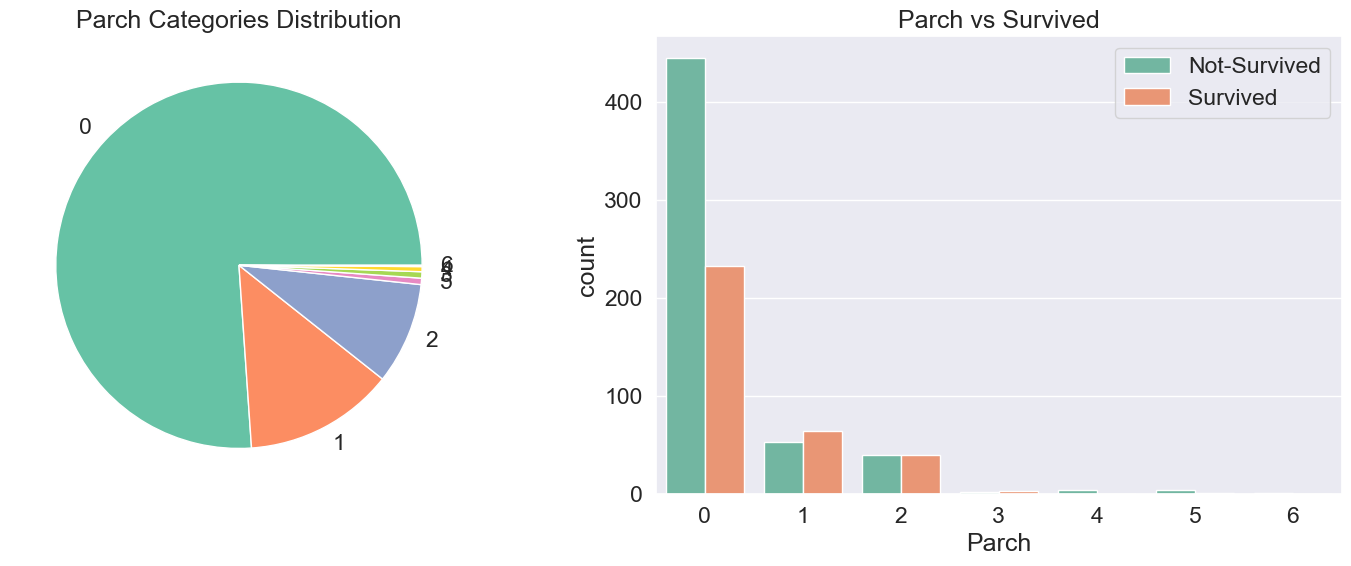

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(z["Parch"],labels=z.index.tolist())
plt.title("Parch Categories Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Parch",hue="Survived",data=train_df)
plt.title("Parch vs Survived")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 From pie-chart we can easily observe that almost 80% of passengers are travelling with their parents or childrens.<br>
💡 From countplot we can observe following things<br>
1. If the passengers is travelling with 0 parent/children than they have almost half chance of Survival<br>
2. If the passengers is travelling with 1 or 2 parent/children than they have almost equal chane of Survival<br>
3. We can't make any observation for passengers travelling with more than 2 parent/children because there are very few datapoints.<br>

<b>Insights</b><br>

💡 We can do Feature Engineering and can create a new feature Parch category which will indicate following thing:<br>
1. If the passengers is travelling with 0 parent/children than we can group them as one category No Parents/Children<br>
2. If the passengers is travelling with 1 or 2 parent/children than we can group them as Average Parents/Children<br>
3. Since we couldn't make any observation for passengers travelling with more than 2 parents/children so we can group them as one category Extra parents/Children<br>
4. We will do this in the Feature Engineering Section<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. Visualizing- </b> Fare Feature </h2>

In [31]:
train_df["Fare"].head().to_frame()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


**Note**
* This fare price is showing the amount paid to get the ticket for Travelling.
* This fare values are in **$**

**Plotting Histplot to gain Insights**

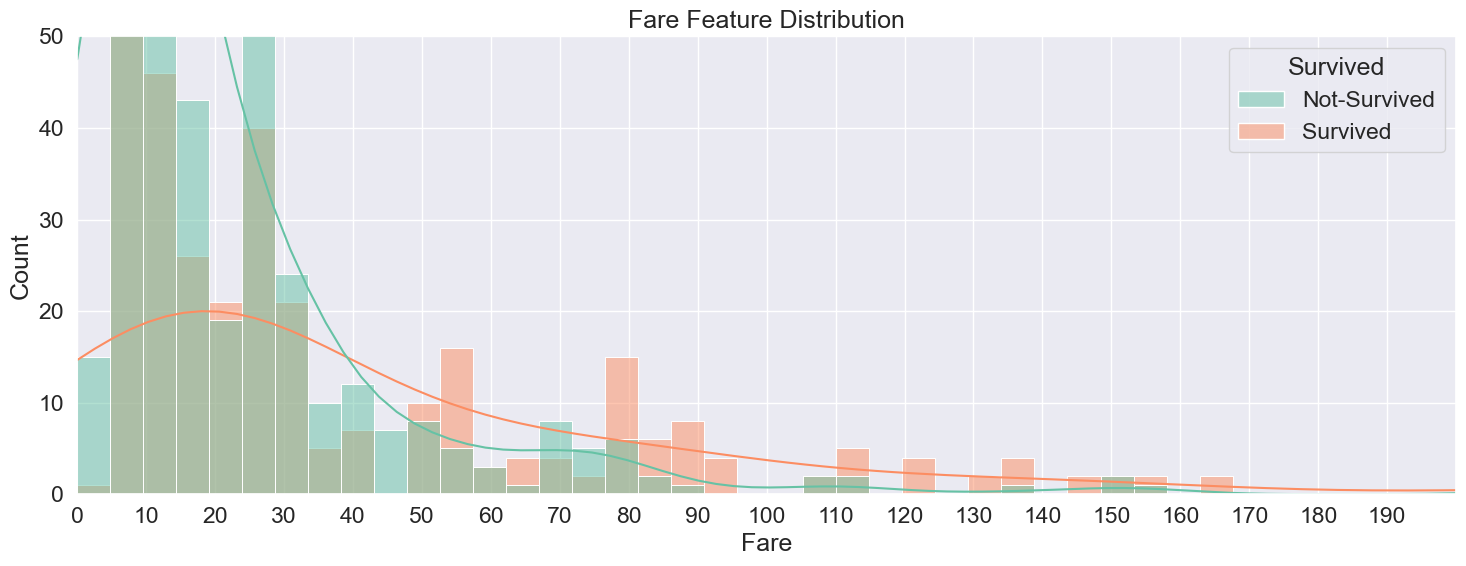

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(x="Fare",hue="Survived",data=train_df,kde=True)
plt.title("Fare Feature Distribution")
plt.ylim(0,50)
plt.xlim(0,200)
plt.xticks(list(range(0,200,10)))
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 Passengers having Fare charge between 0 to 5 are having almost negligible chance of Survival when compared with Non Survived<br>
💡 Passengers having Fare charge between 6 to 40 are having almost equal chance of Survival when comapred with Non Survived<br>
💡 Passengers having Fare charge greater than 50 are having very high chance of Survival when comparedd with Non Survived<br>

<b>Note</b><br>

💡 Passengers having Fare charge between 41 to 50 are having No Survived Passengers which can be taken as exception case.<br>

<b>Insights</b><br>
    
💡 We can do Feature Engineering and can create a new feature Fare Range in which we can split fare into different categories.<br>
💡 We will do that in Feature Engineering Section<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. Visualizing- </b> Embarked Feature </h2>

In [33]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>

💡 Embarked implies where the traveler mounted from. <br>
💡 There are three possible values for Embark — S for Southampton, C for Cherbourg, and Q for Queenstown.<br>
💡 NaN is just the missing calues present in our featrue.<br></div>

In [34]:
z = train_df["Embarked"].value_counts().to_frame()
z

,Embarked
S,644
C,168
Q,77


**Ploting Pie-Chart and Countplot to gain Insights**

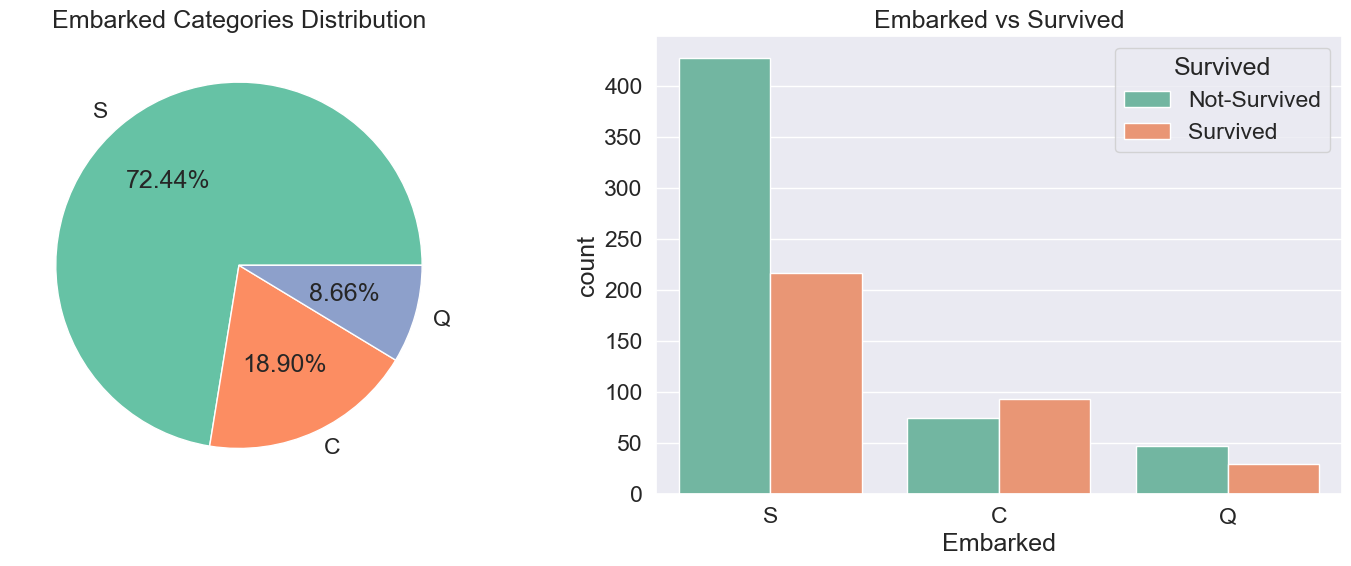

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(z["Embarked"],labels=z.index.tolist(),autopct="%0.2f%%")
plt.title("Embarked Categories Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Embarked",hue="Survived",data=train_df)
plt.title("Embarked vs Survived")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 From pie-chart we can observe that almost 73% of passengers are from Southampton<br>
💡 From countplot we can observe following things:<br>
1. If the passengers is from Southampton than they have almost half chance of Survival<br>
2. If the passengers is from Cherbourg than they have High chance of Survival<br>
3. If the passengers is from Queenstown than they have almost equal or little less chance of Survival<br></div>

----

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>

💡 We have visualized almost all the features except following features:<br>
1. Name & Tickets because they have high Cardianility.<br>
2. Cabin because they have almost 77% of missing values.<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9. Multivariate- </b> Analysis </h2>

* Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

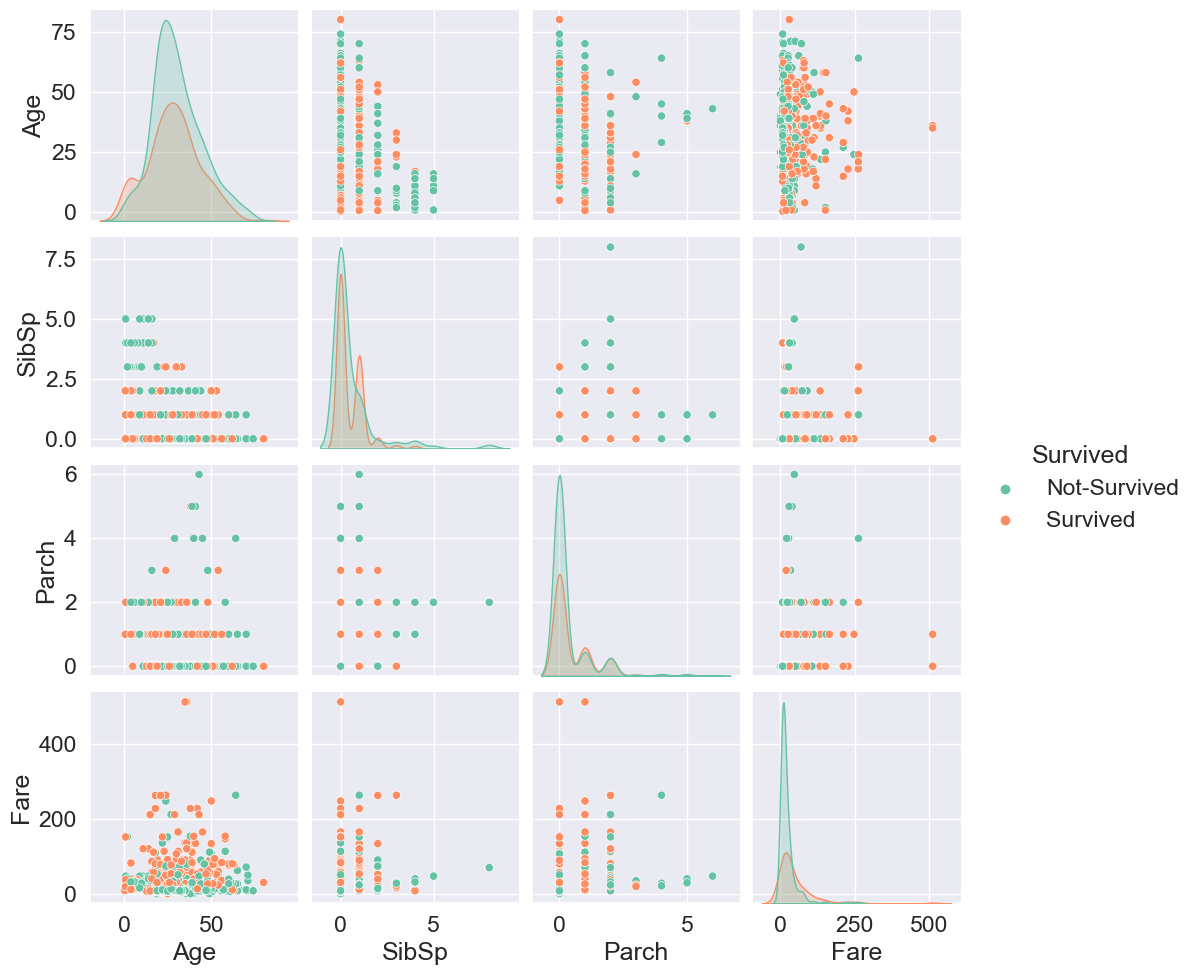

In [36]:
sns.pairplot(train_df.drop(columns="PassengerId"),hue="Survived")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observtion</b><br>
    
💡 We can observe that Age feature is having kind of Normal Distrbutions. So it's seems very useful Feature.<br>
💡 We can observe in Fare feature that it is having a Right Skewed Distribution. So we have use log transformation technique to make Fare feature normally distributed. So that our model can create more relevant patterns.<br>

<b>Note</b><br>
    
* The distribution of Parch & SibSp doesn't matter because they are have values as categories.<br></div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Feature Engineering</b></div>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">1. Creating New Feature - <b> Family-Size </b></h2> 

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Steps for feature engineering</b><br>

💡 We know that passengerId stores the information of a single passenger.<br>
💡 We also know that SibSp stores the values indicating number of siblings or spouse the passenger is travelling with.<br>
💡 We also know that Parch stores the values indiccating number of parents or childrens the passenger is travelling with.<br>
💡 So we create a new feature family_size by adding all the values of SibSp & Parch features of each individual passengers.<br></div>

In [ ]:
train_df[["Name","SibSp","Parch"]].head()

**Creating New Feature in Training Data**

In [ ]:
train_df["Family_Size"] = (train_df["SibSp"] + train_df["Parch"] + 1)

**Creating New Feature in Testing Data**

In [ ]:
test_df["Family_Size"] = (test_df["SibSp"] + test_df["Parch"]+ 1)

----

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">Visualizing- <b> Family-Size </b>Feature</h2> 

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x="Family_Size",data=train_df,palette="summer")
plt.title("Family_Size Category wise Counts")

plt.subplot(1,2,2)
sns.countplot(x="Family_Size",hue="Survived",data=train_df,palette="bright")
plt.title("Family_Size vs Survived")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation From 1st Graph</b><br>
    
💡 By looking at the graph we can easily say more than 60% of the passengers are travelling alone<br>
💡 We can also observe Highest family size is 11<br>

<b>Observation From 2nd Graph</b><br>

💡 Passengers travelling alone are having almost half chances of Survival<br>
💡 Passengers travelling with 2 to 4 family members are having very High chances of survival<br>
💡 Passengers travelling with more than 4 family members are having almost negligible chances of Survival<br>

    
<b>Insights</b><br>
    
💡 We can create a new feature Solo_Traveller which can indicate whether the passenger is travelling alone or with family.<br></div>

****

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">2. Creating New Feature - <b> Solo-Traveller </b></h2> 

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Steps for feature engineering</b><br>

💡 We can create a new feature Solo_traveller using Family_Size feature which will store boolean values<br>
💡 If the passenger is travelling alone than True<br>
💡 If the passenger is travelling with their families than False<br></div>

In [ ]:
train_df[["Family_Size"]].head()

**Creating New Feature in Training Data.**

In [ ]:
train_df["Solo_Traveller"] = (train_df["Family_Size"]==1)

**Creating New Feature in Testing Data.**

In [ ]:
test_df["Solo_Traveller"] = (test_df["Family_Size"]==1)

***

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">Visualizing- <b> Solo-Traveller </b>Feature</h2> 

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
z = train_df["Solo_Traveller"].value_counts().to_frame()
plt.pie(z["Solo_Traveller"], labels=z.index, autopct="%0.2f%%", textprops={"fontweight":"black","size":15})
plt.title("Solo vs Family")

plt.subplot(1,2,2)
sns.countplot(x="Solo_Traveller",hue="Survived",data=train_df)
plt.title("Solo_Traveller vs Survived")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>
       
💡 From first graph we can easily say Solo Travellers are more<br>
💡 From second graph we can say that Passengers with family have survived more when compared with alone passengers.<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">3. Creating New Feature - <b> Age-Category </b></h2> 

In [ ]:
train_df["Age"].head().to_frame()

**Descriptive Analysis on Age Feature**

In [ ]:
train_df["Age"].agg(["min","median","mean","std","max"]).to_frame().T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>

💡 Recall the Insights we gained while doing EDA on Age Feature.<br>
💡 We gained that we can create a new feature Age Category by splitting ages into different categoris.<br></div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Steps for feature engineering</b>
    
1. If the age is between 0 to 12 than we can group them as one category Children<br>
2. If the age is between 12 to 20 than we can group them as one category Teenager<br>
3. If the age is between 20 to 50 than we can group them as one category Adults<br>
4. If the age is above 50 than we can group them as one category Senior Citizens<br></div>

**Creating New Feature in Training Data**

In [ ]:
train_df["Age_Category"] = pd.cut(train_df["Age"], bins=[0,12,20,50,100], labels=["Children","Teenager","Adult","Senior Citizen"])

**Creating New Feature in Testing Data**

In [ ]:
test_df["Age_Category"] = pd.cut(test_df["Age"], bins=[0,12,20,50,100], labels=["Children","Teenager","Adult","Senior Citizen"])

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">Visualizing- <b> Age-Category </b>Feature</h2> 

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
z = train_df["Age_Category"].value_counts().to_frame()
plt.pie(z["Age_Category"], labels=z.index, autopct="%0.2f%%",textprops={"fontweight":"black","size":15})
plt.title("Different Age Categories")

plt.subplot(1,2,2)
sns.countplot(x="Age_Category",hue="Survived",data=train_df)
plt.title("Age_Category vs Survived")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>
    
💡 From first graph we can easily observe that most of the passenegrs are Adults<br>
💡 From second graph we can easily observe that Childrens have more survived when compared with any other age categories.<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">4. Creating New Feature - <b> SibSp-Category </b></h2> 

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>

💡 Recall the insights we gained while doing EDA on SibSp Feature.<br>
💡 We gained that we can create a new feature SibSp Category.<br>

<b>Steps for Feature Engineering</b><br>
    
1. If the passengers is travelling with 0 sibling/spouse than we can categorize them as No Sibling/Spouse<br>
2. If the passengers is travelling with 1 or 2 sibling/spouse than we can group them together as Average Sibling/Spouse<br>
3. If the passengers is travelling with more than 2 sibling/spouse than we an group them as Extra Sibling/Spouse<br></div>

**Creating Function so that we can create new feature for both Training & Testing Data at once**

In [ ]:
def sibsp_category(df):
    sibsp = []
    
    for i in df["SibSp"]:
        if i==0:
            sibsp.append("No Sibling/Spouse")
        elif i==1 or i==2:
            sibsp.append("Average Sibling/Spouse")
        else:
            sibsp.append("Extra Sibling/Spouse")
    df["SibSp_Category"] = sibsp

In [ ]:
sibsp_category(train_df)
sibsp_category(test_df)

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">Visualizing- <b> SibSp-Category </b>Feature</h2> 

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
z = train_df["SibSp_Category"].value_counts().to_frame()
plt.pie(z["SibSp_Category"],labels=z.index,autopct="%0.2f%%",textprops={"fontweight":"black","size":15})
plt.title("Different SibSp Categories")

plt.subplot(1,2,2)
sns.countplot(x="SibSp_Category",hue="Survived", data=train_df)
plt.title("SibSp Category Countplot")
plt.xticks(size=12)
plt.tight_layout()
plt.show()


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>

💡 We can observe that most of the passenegrs are travelling without siblings or spouse.<br>
💡 If the passengers has no siblings or no spouse than they have only half chances of Survival.<br>
💡 If the passengers has average siblings/spouse than they have very High chances of Survival<br>
💡 If the passengers has Extra siblings/spouse than they have negligible chances of Survival<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">5. Creating New Feature - <b> Parch-Category </b></h2> 

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>

💡 Recall that we gained some insights while doing EDA on Parch Feature.<br>
💡 We gained that we can create a new feature Parch category<br>

<b>Steps for feature engineering</b><br>
    
1. If the passengers is travelling with 0 parents/children than we can group them as one category No Parents/Children<br>
2. If the passengers is travelling with 1 or 2 parents/children than we can group them as Average Parents/Children<br>
3. Since we couldn't make any observation for passengers travelling with more than 2 parents/children so we can group them as one category high parents/Children<br></div>

**Creating a function so that we can create new feature for both Training & Testing Dataset at once**

In [ ]:
def parch_category(df):
    parch = []
    
    for i in df["Parch"]:
        if i==0:
            parch.append("No Parents/Childrens")
        elif (i==1) or (i==2):
            parch.append("Average Parents/Childrens")
        else:
            parch.append("Extra Parents/Children")
            
    df["Parch_Category"] = parch

In [ ]:
parch_category(train_df)
parch_category(test_df)

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">Visualizing- <b> Parch-Category </b>Feature</h2> 

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
z = train_df["Parch_Category"].value_counts().to_frame()
plt.pie(z["Parch_Category"],labels=z.index, autopct="%0.2f%%",textprops={"fontweight":"black","size":13})
plt.title("Different Parch categories")

plt.subplot(1,2,2)
sns.countplot(x="Parch_Category",hue="Survived",data=train_df)
plt.title("Parch Category Countplot")
plt.xticks(size=10)
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>

💡 Most of the passengers are travelling withoout Parents or children.<br>
💡 If the passenger is having No Parents/Childrens then they have half chances of Survival<br>
💡 If the passenger is having Average Parents/Childrens then they have High chances of Survival<br>
💡 If the passenger is having Extra Parents/Childrens then they have Negligible chances of Survival<br></div>

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">6. Creating New Feature - <b> Fare-Range </b></h2> 

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>

💡 We have 1 missing values in our testing data so we will keep that in mind while doing featrue engineering.<br>
💡 Recall the insights we gained while doing EDA on Fare Feature.<br>
💡 We gained that we can create a Fare Range by splitting Fare into different ranges.<br></div>

**Descriptive Analysis on Fare Feature**

In [ ]:
train_df["Fare"].agg(["min","median","mean","std","var","max"]).to_frame().T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Steps for feature engineering</b><br>

1. Passengers having Fare charge between 0 to 7 can be grouped as Low Fare Passengers.<br>
2. Passengers having Fare charge between 8 to 14.45 can be grouped as Medium Fare Passengers.<br>
3. Passengers having Fare charge between 14.45 to 32.20 can be grouped as Average Fare Passengers.<br>
3. Passengers having Fare charge greater than 32.20 can be grouped as High Fare Passengers.<br></div>

**Creating a Function so that we can create new feature on both Training & Testing Datasets at once**

In [ ]:
def fare_range(df):
    fare = []
    
    for i in df["Fare"]:
        if i<=7:
            fare.append("Low Fare")
        elif (i>=7 and i<=14.45):
            fare.append("Medium Fare")
        elif (i>14.45 and i<=32.20):
            fare.append("Average Fare")
        elif (i>32.20):
            fare.append("High Fare")
        else:
            fare.append(np.nan)       #Because of NaN value present in test dataset.++
    df["Fare_Range"] = fare

In [ ]:
fare_range(train_df)
fare_range(test_df)

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;">Visualizing- <b> Fare-Range </b>Feature</h2> 

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
z = train_df["Fare_Range"].value_counts().to_frame()
plt.pie(z["Fare_Range"], labels=z.index, autopct="%0.2f%%",textprops={"fontweight":"black","size":13})
plt.title("Fare Rabge Categories")

plt.subplot(1,2,2)
sns.countplot(x="Fare_Range",hue="Survived",data=train_df)
plt.title("Fare Range vs Survived")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>

💡 We can say that most of the passengers paid atleat average amount of fare to get the ticket.<br>
💡 If the passengers fare is low than most of the passengers didn't survived<br>
💡 If the passengers fare is medium than they were having half chances of survival.<br>
💡 If the passengers fare is average than they were having high chances of survival<br>
💡 If the passengers fare is high than they have very high chances of survival.<br></div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Data Pre-Processing</b></div>

### 1. Checking Missing Values & Their Percentage

In [ ]:
df = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing Values"})
df["% of Missing values"] = round(df["Number of Missing Values"]*100/len(train_df),2)
df

### 2. Visualizing Missing Values.

In [ ]:
plt.figure(figsize=(17,5))
sns.heatmap(train_df.isnull(),cmap="summer")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>

💡 We can clearly observe that Cabin feature is having almost 77% of miising values.<br>
💡 So it's better if we drop this feature.<br>
💡 In other Feature we will replace those Missing Values with NaN Values.<br></div>

### 3. Handling Missing Values

In [ ]:
train_df.drop(columns="Cabin",inplace=True)
test_df.drop(columns="Cabin",inplace=True)

In [ ]:
train_df.drop(columns=["PassengerId"],inplace=True)

In [ ]:
cat_cols = train_df.select_dtypes(include=["object"]).columns.tolist()
cat_cols.remove("Survived")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

In [ ]:
print("Categorical Columns:",cat_cols)
print("\n","-"*120)
print("\nNumerical Columns:",num_cols)

**Using Simple Imputer Library to Fill Missing Values**

In [ ]:
imputer1 = SimpleImputer(strategy="most_frequent")     ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [ ]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [ ]:
fill_missingno(train_df)
fill_missingno(test_df)

In [ ]:
print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

### 4 Checking Duplicacy in Data.

In [ ]:
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

### 5. Checking Cardinality of Categorical Features.

In [ ]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>
    
💡 We have done all feature engineering now we can drop features which have high cardinality.<br>
💡 So we can drop Name and Ticket features.<br></div>

**Dropping Categorical Features with High Cardinality**

In [ ]:
cols = ["Name","Ticket"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

### 6. Gathering Statistical Information of Numerical Features.

In [ ]:
train_df.describe().T

### 7. Applying Log Transformation on Fare Feature

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>
    
💡 In pairplot we found that the Fare feature is having right skewed distribution<br>
💡 So let's convert it to normal distribution using log transformation<br></div>

In [ ]:
train_df["Fare"] = np.log(1+train_df["Fare"])
test_df["Fare"]=np.log(1+test_df["Fare"])

### 8. Visualizing Fare After Transformation

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x="Fare",hue="Survived",kde=True,data=train_df)
plt.title("Fare Distrbiution")
plt.show()

### 9. Checking Data - Types of Features.

In [ ]:
train_df.dtypes

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>
    
💡 Features likes Survived, Pclass, Sex, Solo_Traveller, Embarked, Age_Category, SibSp Category, Parch_Category , Fare Range & Title are having their data-type as object<br>
💡 So we have encode those features and make them numerical features.<br>
💡 So that model can learn more create patterns more accurately.<br></div>

### 10. Feature Encoding

* We will do **One-Hot-Encoding** for nominal categorical featrues.
* we will do **Label Encoding** for ordinal categorical features.

In [ ]:
nominal_cols = ["Pclass","Sex","Embarked","Solo_Traveller"]
ordinal_cols = ["Age_Category","SibSp_Category","Parch_Category","Fare_Range"]

**One-Hot-Encoding**

In [ ]:
train_df = pd.get_dummies(columns=nominal_cols, data=train_df)

In [ ]:
test_df = pd.get_dummies(columns=nominal_cols, data=test_df)

**Label-Encoding**

In [ ]:
encoder = LabelEncoder()

In [ ]:
train_df[ordinal_cols] = train_df[ordinal_cols].apply(encoder.fit_transform)
test_df[ordinal_cols] = test_df[ordinal_cols].apply(encoder.fit_transform)

**Note**
* We still have one feature **Survived** left to encode in our Train Data

**Encoding Survived Feature**

In [ ]:
train_df["Survived"].unique()

In [ ]:
train_df["Survived"] = train_df["Survived"].replace({"Survived":1,"Not-Survived":0})

**Checking all the features are encoed or not**

In [ ]:
train_df.head()

In [ ]:
test_df.head()

### 11. Selecting Features & Labels For Model Training.

In [ ]:
X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

### 12. Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

### 13. Splitting Data For Model Which Don't Need Scaled Data.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape, y_train.shape)

In [ ]:
print(x_test.shape,y_test.shape)

### 14. Splitting Data For Model Which Need Scaled Data.

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train1.shape, y_train1.shape)

In [ ]:
print(x_test1.shape, y_test1.shape)

-------------------------------------------------------------------------------------

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Model Building For Sclaed Data</b></div>

In [ ]:
training_score = []
testing_score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Set1")
    plt.show()

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Logistic Regression </b> Model </h2>

In [ ]:
model_prediction(LogisticRegression())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. KNeighborsClassifier </b> Model </h2>

In [ ]:
model_prediction(KNeighborsClassifier())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Support Vector Machine </b> Model </h2>

In [ ]:
model_prediction(SVC())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. Naive Bayes </b> Model </h2>

In [ ]:
model_prediction(GaussianNB())

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Model Building For Un-Sclaed Data</b></div>

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Set1")
    plt.show()

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. DecisionTree Classifier </b> Model </h2>

In [ ]:
model_prediction(DecisionTreeClassifier())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6. Random Forest Classifier </b> Model </h2>

In [ ]:
model_prediction(RandomForestClassifier())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. Ada Boost Classifier </b> Model </h2>

In [ ]:
model_prediction(AdaBoostClassifier())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. Gradient Boosting Classifier </b> Model </h2>

In [ ]:
model_prediction(GradientBoostingClassifier())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9.LGBM </b> Model </h2>

In [ ]:
model_prediction(LGBMClassifier())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>10. XGBoost </b> Model </h2>

In [ ]:
model_prediction(XGBClassifier())

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>11. CatBoost </b> Model </h2>

In [ ]:
model_prediction(CatBoostClassifier(verbose=False))

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Model's Performance Comparison</b></div>

In [ ]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [ ]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [ ]:
df

### Plotting above results using column-bar chart.

In [ ]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 Highest performance was give by GradientBoosting approx 86%.<br>
💡 Second Highest performance was given by LGBM approx 84%<br>
💡 But RandomForest, XGBoost & CatBoost Model performance was also good.<br>
💡 So we will do Hyper-Parameter Tunning on these five Models.<br></div>

----------------------------------------------------------------------------------------

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Hyper-Parameter Tunning of GradientBoosting Model</b></div>

In [ ]:
model1 = GradientBoostingClassifier()

In [ ]:
parameters1 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [ ]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [ ]:
grid_search1.fit(x_train,y_train)

In [ ]:
grid_search1.best_score_

In [ ]:
best_parameters1 = grid_search1.best_params_
best_parameters1

### Creating GradientBoost Model Using Best Parameters

In [ ]:
gradientboost_clf = GradientBoostingClassifier(**best_parameters1)

In [ ]:
gradientboost_clf.fit(x_train,y_train)

In [ ]:
x_test_pred1 = gradientboost_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred1)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
    
💡 We can clearly observe that GradientBoost Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br></div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Hyper Parameter Tunning of LGBM Model</b></div>

In [ ]:
model2 = LGBMClassifier()

In [ ]:
parameters2 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

In [ ]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [ ]:
grid_search2.fit(x_train,y_train)

In [ ]:
grid_search2.best_score_

In [ ]:
best_parameters2 = grid_search2.best_params_
best_parameters2

### Creating LGBM Model Using Best Parameters.

In [ ]:
lgbm_clf  = LGBMClassifier(**best_parameters2)

In [ ]:
lgbm_clf.fit(x_train,y_train)

In [ ]:
x_test_pred2 = lgbm_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred2)

---

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can clearly observe that our LGBM Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br></div>

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Hyper Parameter Tunning of CatBoost Model</b></div>

In [ ]:
model3 = CatBoostClassifier(verbose=False)

In [ ]:
parameters3 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [ ]:
grid_search3 = GridSearchCV(model3, parameters3, cv=5, n_jobs=-1)

In [ ]:
grid_search3.fit(x_train,y_train)

In [ ]:
grid_search3.best_score_

In [ ]:
best_parameters3 = grid_search3.best_params_
best_parameters3

### Creating Cat Boost Model Using Best Parameters

In [ ]:
catboost_clf = CatBoostClassifier(**best_parameters3,verbose=False)

In [ ]:
catboost_clf.fit(x_train,y_train)

In [ ]:
x_test_pred3 = catboost_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred3)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can clearly observe that our CatBoost Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br></div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Hyper Parameter Tunning of XGBoost Model</b></div>

In [ ]:
model4 = XGBClassifier()

In [ ]:
parameters4 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [ ]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [ ]:
grid_search4.fit(x_train,y_train)

In [ ]:
grid_search4.best_score_

In [ ]:
best_parameters4 = grid_search4.best_params_
best_parameters4

### Creating XGBoost Model Using Best Parameters

In [ ]:
xgboost_clf = XGBClassifier(**best_parameters4)

In [ ]:
xgboost_clf.fit(x_train,y_train)

In [ ]:
x_test_pred4 = xgboost_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred4)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 We can clearly observe that our XGBoost Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br></div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Hyper Parameter Tunning of Random-Forest Model</b></div>

In [ ]:
model5 = RandomForestClassifier()

In [ ]:
parameters5 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}
    

In [ ]:
grid_search5 = GridSearchCV(model5, parameters5, cv=5, n_jobs=-1)

In [ ]:
grid_search5.fit(x_train,y_train)

In [ ]:
grid_search5.best_score_

In [ ]:
best_parameters5 = grid_search5.best_params_
best_parameters5

### Creating Random Forest Model Using Best Parameters

In [ ]:
randomforest_clf = RandomForestClassifier(**best_parameters5)

In [ ]:
randomforest_clf.fit(x_train,y_train)

In [ ]:
x_test_pred5 = randomforest_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred5)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>

💡 We can clearly observe that Random Forest Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br></div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Stacking Model Classifier</b></div>

In [ ]:
stacking_model = StackingClassifier(estimators=[('GBoost', gradientboost_clf),
                                                ('LGBM', lgbm_clf),
                                                ('CAT Boost', catboost_clf),
                                                ("XGBoost", xgboost_clf),
                                                ("RF",randomforest_clf)])

In [ ]:
stacking_model.fit(x_train, y_train)

In [ ]:
x_train_pred6 = stacking_model.predict(x_train)

In [ ]:
x_test_pred6 = stacking_model.predict(x_test)

In [ ]:
print("Stacking Model accuracy on Training Data is:",accuracy_score(y_train,x_train_pred6)*100)

In [ ]:
print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred6)*100)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can observe that our Stacking Model is having kind of Best Fitting<br>
💡 Stacking Model is not having any kind of over_fitting or under_fitting<br>
💡 So, we can use this Stacking Model to predict our test_data and then submit it on kaggle.<br></div>

---

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Predicting Test Data using Stacking Model</b></div>

**Extracting & Removing PassengerId from Test Data**

In [ ]:
test_df.rename(columns={"Pclass_1":"Pclass_Lower_Class","Pclass_2":"Pclass_Middle_Class","Pclass_3":"Pclass_Upper_Class"},inplace=True)

In [ ]:
df = test_df[["PassengerId"]]
test_df.drop(columns=["PassengerId"],inplace=True)

In [ ]:
pred = stacking_model.predict(test_df)

In [ ]:
pred

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Submission DataFrame Format</b></div>

In [ ]:
df.head()

In [ ]:
df["Survived"] = pred

In [ ]:
df.head()

**Submission**

In [ ]:
df.to_csv("Titanic_Survival_Prediction.csv",index=False)

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b> Conclusion </b></h2>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Titanic Survival Project</b><br>
    
💡 The main objective of this project was to predict whether the passengers will be transported to alternate dimensions or not using the independent features given.<br>

<b>Key-Points</b><br>
    
💡 We were havinng very few usefull independent features in the dataset.<br> 
💡 So I have done various feature engineering to create some new relevant features for better predictions.<br>
💡 The main objective of feature engineering was to avoid data loss.<br>
💡 I have used different classifiers machine learning techniques for predictions.<br>
💡 Then I  have compared all the preddictions given by different classifier models.<br>
💡 Then I have selected the best performing classifier modles.<br>
💡 The best performing Models were XGboost,LGBM, CatBoost,& GradientBoosting<br>
💡 But this models were having overfiiting.<br>
💡 So to reduce overfitting from the model I have done Hyper-Parameter Tunning<br>
💡 Then I haved used Stacking Ensemble Technique to boost my predictions.<br>
💡 In stacking Model I have used all the Models created after Hyper-Parameter Tunning.<br>
💡 In the end I have used Stacking Model to predict our test data.<br></div>